In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv('spam.csv', encoding='latin1')
df.head() 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [34]:
#part 1 Data Cleaning

In [36]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True, errors='ignore')

In [38]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
df.rename(columns={'v1': 'spam-identification','v2': 'sms-sent'}, inplace=True)
df.head()

,spam-identification,sms-sent
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
#check null values 
df.isnull().sum()

spam-identification    0
sms-sent               0
dtype: int64

In [44]:
#check duplicate values
df.duplicated().sum()

403

In [46]:
#remove duplicates
df.drop_duplicates(inplace=True)


In [48]:
df.duplicated().sum()


0

In [50]:
#part 2 EDA

In [52]:
df['spam-identification'].value_counts()

spam-identification
ham     4516
spam     653
Name: count, dtype: int64

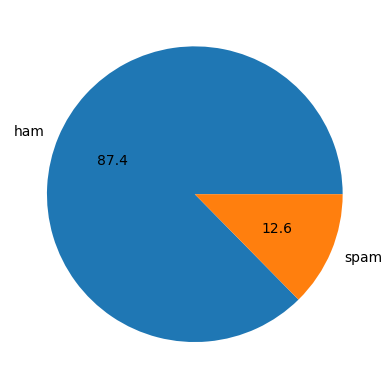

In [54]:
plt.pie(df['spam-identification'].value_counts(), labels=['ham','spam'], autopct='%1.1f')
plt.show()

In [55]:
#calculating no of characters in each sms
df['num_char'] = df['sms-sent'].str.len()

#calculating no of words in each sms
df['num_word'] = df['sms-sent'].str.split().str.len()

#calculating no of sentences in each sms
def count_sentences(text):
    # Count occurrences of sentence-ending punctuation marks
    return text.count('.') + text.count('!') + text.count('?')
df['num_sen'] = df['sms-sent'].apply(count_sentences)

df.head()

,spam-identification,sms-sent,num_char,num_word,num_sen
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,8
1,ham,Ok lar... Joking wif u oni...,29,6,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,ham,U dun say so early hor... U c already then say...,49,11,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [58]:
df['spam-numeric'] = df['spam-identification'].map({'ham': 0, 'spam': 1})
df.head()

,spam-identification,sms-sent,num_char,num_word,num_sen,spam-numeric
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,8,0
1,ham,Ok lar... Joking wif u oni...,29,6,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,1
3,ham,U dun say so early hor... U c already then say...,49,11,6,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,0,0


In [60]:
correlation_matrix = df[['spam-numeric','num_char', 'num_word', 'num_sen']].corr()
print(correlation_matrix)

              spam-numeric  num_char  num_word   num_sen
spam-numeric      1.000000  0.384717  0.286576  0.075214
num_char          0.384717  1.000000  0.973667  0.491426
num_word          0.286576  0.973667  1.000000  0.473288
num_sen           0.075214  0.491426  0.473288  1.000000


<Axes: >

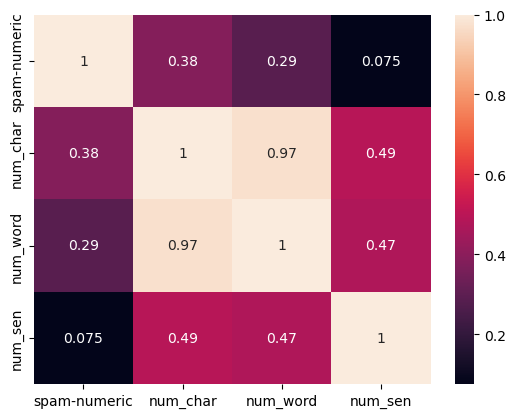

In [62]:
sns.heatmap(correlation_matrix, annot=True)

In [63]:
# part 3 data preprocessing

In [66]:
!pip install nltk

In [67]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [68]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
ps = PorterStemmer()

In [70]:
def transform_text(text):
    #convert each character in lower case
    text=text.lower()

    #tokenize each word
    text=word_tokenize(text)

    #remove specials characters, stop words and punctuation
    new_text=[]
    for word in text:
        if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation:
            new_text.append(word)
   
    #remove stemming
    text = new_text[:]
    new_text.clear()
    for word in text:
        new_text.append(ps.stem(word))
    return " ".join(new_text)

In [71]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [72]:
df['sms-sent'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [73]:
df['transformed_text'] = df['sms-sent'].apply(transform_text)

In [74]:
df.head()

,spam-identification,sms-sent,num_char,num_word,num_sen,spam-numeric,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,8,0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,6,6,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,11,6,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,0,0,nah think goe usf live around though


In [75]:
from collections import Counter

In [76]:
#finding most common spam msg
spam_messages = df[df['spam-numeric'] == 1]['transformed_text']
all_spam_words = " ".join(spam_messages)
spam_word_list = all_spam_words.split()
spam_word_freq = Counter(spam_word_list).most_common(40)
print(spam_word_freq)

[('call', 320), ('free', 191), ('2', 155), ('txt', 141), ('text', 122), ('u', 119), ('ur', 119), ('mobil', 114), ('stop', 104), ('repli', 103), ('claim', 98), ('4', 97), ('prize', 82), ('get', 74), ('new', 64), ('servic', 64), ('tone', 63), ('send', 60), ('urgent', 57), ('nokia', 57), ('contact', 56), ('award', 55), ('phone', 52), ('cash', 51), ('pleas', 51), ('week', 49), ('win', 48), ('c', 45), ('collect', 45), ('min', 45), ('custom', 42), ('messag', 42), ('guarante', 42), ('per', 41), ('chat', 38), ('tri', 37), ('msg', 35), ('draw', 35), ('number', 35), ('cs', 35)]


In [77]:
#creating a separate dataframe for most common spam words
pd.DataFrame(spam_word_freq, columns=['Spam-Word', 'Frequency'])

,Spam-Word,Frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [78]:
#finding most common ham msg
ham_messages = df[df['spam-numeric'] == 0]['transformed_text']
all_ham_words = " ".join(ham_messages)
ham_word_list = all_ham_words.split()
ham_word_freq = Counter(ham_word_list).most_common(40)
print(ham_word_freq)

[('u', 883), ('go', 404), ('get', 349), ('gt', 288), ('lt', 287), ('2', 284), ('come', 275), ('got', 236), ('know', 236), ('like', 234), ('call', 233), ('time', 219), ('ok', 217), ('love', 216), ('good', 213), ('want', 208), ('ur', 197), ('day', 190), ('need', 170), ('one', 165), ('lor', 159), ('4', 156), ('home', 152), ('think', 149), ('see', 147), ('take', 143), ('still', 143), ('da', 142), ('tell', 133), ('make', 129), ('say', 127), ('back', 127), ('today', 123), ('hope', 122), ('ask', 121), ('sorri', 121), ('n', 120), ('send', 120), ('r', 120), ('work', 118)]


In [79]:
#creating a separate dataframe for most common ham words
pd.DataFrame(ham_word_freq, columns=['Ham-Word', 'Frequency'])

,Ham-Word,Frequency
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [80]:
#combined spam and ham dataframe 
combined_df = pd.concat([pd.DataFrame(spam_word_freq, columns=['Spam-Word', 'Frequency']), pd.DataFrame(ham_word_freq, columns=['Ham-Word', 'Frequency'])])

In [81]:
#first 10 rows
combined_df.head(10)

,Spam-Word,Frequency,Ham-Word
0,call,320,NaN
1,free,191,NaN
2,2,155,NaN
3,txt,141,NaN
4,text,122,NaN
5,u,119,NaN
6,ur,119,NaN
7,mobil,114,NaN
8,stop,104,NaN
9,repli,103,NaN


In [82]:
#last 10 rows
combined_df.tail(10)

,Spam-Word,Frequency,Ham-Word
30,NaN,127,say
31,NaN,127,back
32,NaN,123,today
33,NaN,122,hope
34,NaN,121,ask
35,NaN,121,sorri
36,NaN,120,n
37,NaN,120,send
38,NaN,120,r
39,NaN,118,work


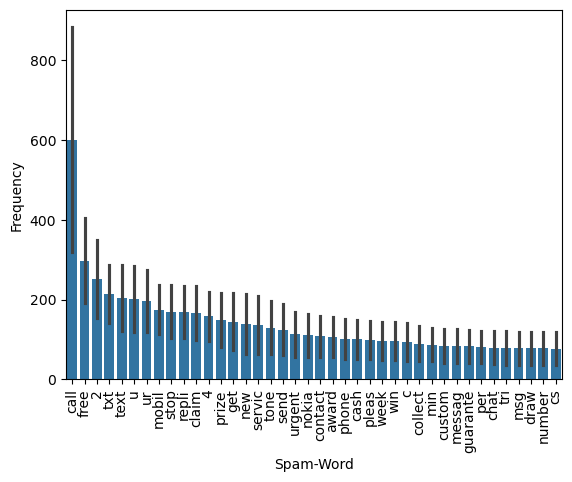

In [83]:
#bar plot of spam msg
sns.barplot(x='Spam-Word', y='Frequency', data=combined_df)
plt.xticks(rotation='vertical')
plt.show()

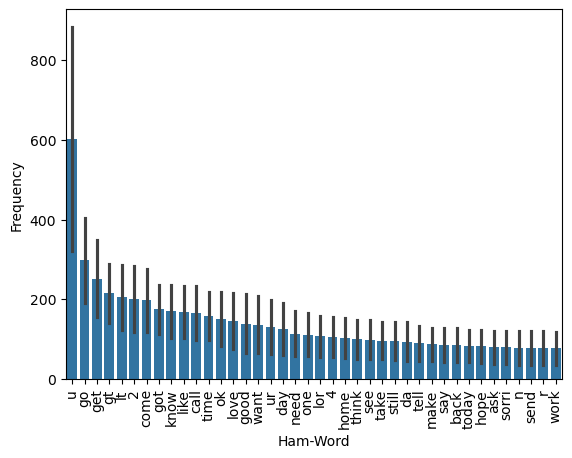

In [84]:
#bar plot of ham msg
sns.barplot(x='Ham-Word', y='Frequency', data=combined_df)
plt.xticks(rotation='vertical')
plt.show()

In [85]:
#part 4 Model building

In [326]:
#vectorizing transformed text
from sklearn.feature_extraction.text import TfidfVectorizer

vect=TfidfVectorizer(max_features=5000)
X=vect.fit_transform(df['transformed_text']).toarray()
Y=df['spam-numeric'].values

In [328]:
#spliting data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (3618, 5000)
Test set size: (1551, 5000)


In [281]:
#train the ml model
#here i am taking naive bayes ml model 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [283]:
# Instantiate the Naive Bayes model
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train, Y_train)

MultinomialNB()

In [285]:
# Make predictions on the test set
Y_pred = model.predict(X_test)

In [287]:
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 96.13%


In [289]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [290]:
#calculate precision score of the model
from sklearn.metrics import precision_score

precision = precision_score(Y_test, Y_pred)
print(f'Precision Score: {precision:.2f}')

Precision Score: 1.00


In [291]:
#our model is giving accuracy 96.95% and precision 1.00 therefore our model is good.

In [322]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, Y_pred)
print(f'Recall Score: {recall*100:.2f}')

from sklearn.metrics import f1_score
f1 = f1_score(Y_test, Y_pred)
print(f'F1 Score: {f1*100:.2f}')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Recall Score: 72.73
F1 Score: 84.21
[[1331    0]
 [  60  160]]


In [297]:
#but using naive bayes model we are not getting good recall value, f1 score and confusion matrix
#so lets try some more models that gives good output

In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [303]:
#vectorizing transformed text
from sklearn.feature_extraction.text import TfidfVectorizer

vect=TfidfVectorizer(max_features=4000)
x=vect.fit_transform(df['transformed_text']).toarray()
y=df['spam-numeric'].values

In [305]:
#spliting data for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=42)

print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)

Training set size: (3618, 5000)
Test set size: (1551, 5000)


In [307]:
# Instantiate and train the logistic regression model
model2 = LogisticRegression()
model2.fit(x_train, y_train)

# Instantiate and train the random forest model
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

# Instantiate and train the support vector classifier model
model4 = SVC()
model4.fit(x_train, y_train)

SVC()

In [309]:
clfs = {
    'LR':model2, 
    'RF':model3,
    'SVC':model4
}

# make predictions on the test set
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    #calculate precision score of the model
    precision = precision_score(y_test, y_pred)

    #calculate recall score of all the models
    recall = recall_score(y_test, y_pred)

    #calculate f1 score of all the models
    f1 = f1_score(y_test, y_pred)

    #calculate confusion matrix of all the models
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm

In [311]:
#print all the scores to check the good model
for name,clf in clfs.items():
    if train_classifier(clf, x_train, y_train, x_test, y_test):
        current_accuracy,current_precision,current_recall,current_f1score,current_cm = train_classifier(clf, x_train,y_train,x_test,y_test)
    
        print("For ",name)
        print(f"Accuracy: {current_accuracy*100:.2f}%")
        print(f"Precision Score: {current_precision*100:.2f}")
        print(f"Recall Score: {current_recall*100:.2f}")
        print(f"F1 Score: {current_f1score*100:.2f}")
        print("confusion matrix:",current_cm)
    else:
        print(f"Metrics for {name} could not be computed.")


For  LR
Accuracy: 94.52%
Precision Score: 0.96
Recall Score: 0.64
F1 Score: 0.77
confusion matrix: [[1325    6]
 [  79  141]]
For  RF
Accuracy: 96.84%
Precision Score: 0.99
Recall Score: 0.79
F1 Score: 0.88
confusion matrix: [[1329    2]
 [  47  173]]
For  SVC
Accuracy: 96.84%
Precision Score: 1.00
Recall Score: 0.78
F1 Score: 0.87
confusion matrix: [[1331    0]
 [  49  171]]


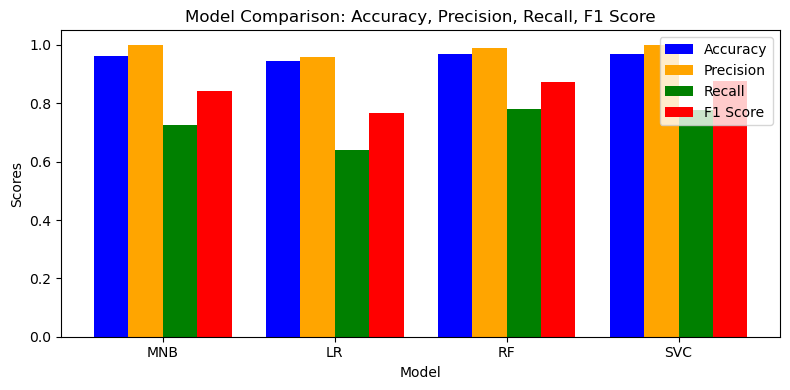

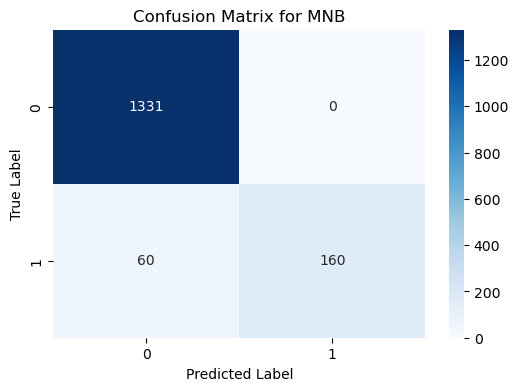

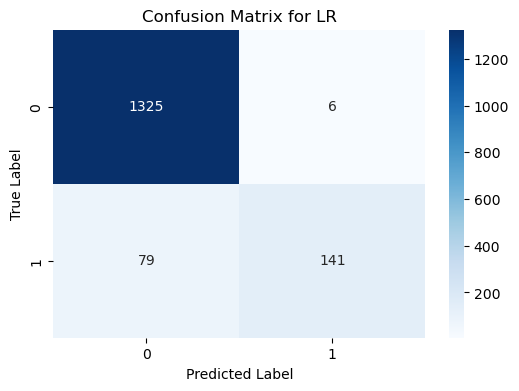

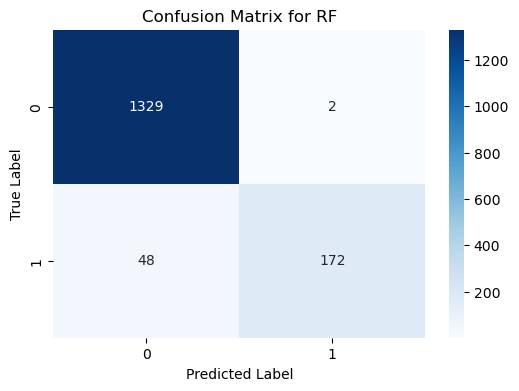

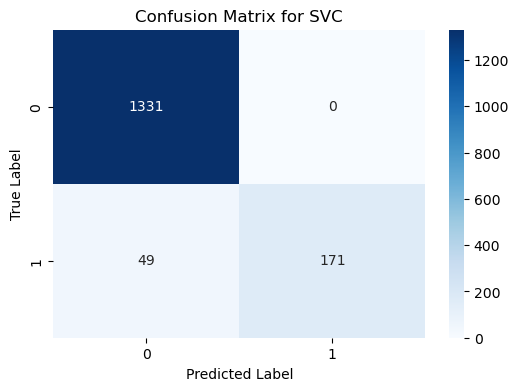

In [334]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Initialize the classifiers and metrics dictionary
clfs = {
    'MNB': model,
    'LR': model2, 
    'RF': model3,
    'SVC': model4
}

metrics_dict = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Model': [],

    # Added to handle confusion matrices separately
    'Confusion Matrix': []  
}

# Train classifiers and gather metrics
for name, clf in clfs.items():
    # Ensure train_classifier returns the confusion matrix too
    current_accuracy, current_precision, current_recall, current_f1score, current_cm = train_classifier(clf, X_train, Y_train, X_test, Y_test)

    # Append the results for each model
    metrics_dict['Accuracy'].append(current_accuracy)
    metrics_dict['Precision'].append(current_precision)
    metrics_dict['Recall'].append(current_recall)
    metrics_dict['F1 Score'].append(current_f1score)
    metrics_dict['Model'].append(name)

    # Storing the confusion matrix separately
    metrics_dict['Confusion Matrix'].append(current_cm)  

# Plotting the bar graph for accuracy, precision, recall, F1 score
fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.2
index = np.arange(len(clfs))

# Plot each metric as bars
ax.bar(index, metrics_dict['Accuracy'], bar_width, label='Accuracy', color='blue')
ax.bar(index + bar_width, metrics_dict['Precision'], bar_width, label='Precision', color='orange')
ax.bar(index + 2 * bar_width, metrics_dict['Recall'], bar_width, label='Recall', color='green')
ax.bar(index + 3 * bar_width, metrics_dict['F1 Score'], bar_width, label='F1 Score', color='red')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Accuracy, Precision, Recall, F1 Score')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(metrics_dict['Model'])
ax.legend()

# Show the bar plot
plt.tight_layout()
plt.xticks(rotation='horizontal')
plt.show()

# Plot Confusion Matrices separately
for i, cm in enumerate(metrics_dict['Confusion Matrix']):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {metrics_dict['Model'][i]}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


In [ ]:
#all the matrices are showing same result and not much good lets try voting classifier which combines multiple different models for better results.

In [330]:
# voting classifier
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the classifiers
mnb = MultinomialNB()
lr = LogisticRegression(max_iter=1000)
svc = SVC(probability=True)  # Enable probability output for voting
rf = RandomForestClassifier()

# Combine them into a VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('mnb', mnb),
    ('lr', lr),
    ('svc', svc),
    ('rf', rf)
], voting='soft')  # Use 'hard' for majority voting or 'soft' for weighted probabilities

# Fit the voting classifier on the training data
voting_clf.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = voting_clf.predict(X_test)

# Evaluate the performance of the voting classifier
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

# Print out the results
print(f'Accuracy: {accuracy*100:.2f}')
print(f'Precision: {precision*100:.2f}')
print(f'Recall: {recall*100:.2f}')
print(f'F1 Score: {f1*100:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 97.42
Precision: 98.91
Recall: 82.73
F1 Score: 90.10
Confusion Matrix:
[[1329    2]
 [  38  182]]


In [ ]:
# this is decreasing our precision which is not good for our project
# therefore will be using naive bayes model.

In [331]:
import pickle
pickle.dump(vect,open('vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))